*   **scikit-learn**
*   **Loading datasets - iris and boston**
*   **Standardization, Normalization, Scaling - Standard scaler and Minmax scaler**
*   **Label encoder, Label binarizer, One hot encoder**
*   **Discretization**
*   **Feature Selection**
*   **Feature Extraction using PCA, LDA**
*   **Matplotlib - Line Plot, Scatter Plot, Barchart, Histogram, Box Plot**



#Import statements

In [219]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [220]:
# sklearn packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading datasets from sklearn

from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston

#Wine dataset

In [221]:
dataset1 = load_wine()
print("Feature list of Wine dataset: ", list(dataset1.feature_names))
print("Target list of Wine dataset: ", list(dataset1.target_names))

df = pd.DataFrame(data= np.c_[dataset1['data'], dataset1['target']],
                     columns= dataset1['feature_names'] + ['target_names'])
print("\nDataset")
print(df)

# features and target
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy score
score = accuracy_score(y_test, y_pred)
print(f"\n\nTest Accuracy Score of Logistic Regression on Wine dataset: {score*100}%")

Feature list of Wine dataset:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target list of Wine dataset:  ['class_0', 'class_1', 'class_2']

Dataset
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0     

#Iris dataset

In [222]:
iris = load_iris()
X = iris.data
y = iris.target
print("\n10 rows of features:\n", X[30:40])
print()
print("\n10 rows of target:\n", y[30:40])
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"\n\nTest Accuracy Score of Logistic Regression on Wine dataset: {score*100}%")
print()

sample_input = [[5.1, 3.3, 1.7, 0.5], [4.7, 3.2, 1.6, 0.2], [6.7, 3. , 5. , 1.7], [6.1, 2.8, 4.7, 1.2]]
sample_output = np.array([0, 0, 1, 1])
predicted_output = classifier_knn.predict(sample_input)

pred_species = [iris.target_names[p] for p in predicted_output]
print("Predictions of flower specis on given data:", pred_species)
if np.array_equal(predicted_output, sample_output):
  print("\nAccurate")
else:
  print("\nNot so Accurate")


10 rows of features:
 [[4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]]


10 rows of target:
 [0 0 0 0 0 0 0 0 0 0]

(105, 4)
(45, 4)
(105,)
(45,)



Test Accuracy Score of Logistic Regression on Wine dataset: 97.77777777777777%

Predictions of flower specis on given data: ['setosa', 'setosa', 'versicolor', 'versicolor']

Accurate


#Boston dataset

In [223]:
boston = load_boston()

print(boston.keys())

df1 = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df1

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#Standardization, Normalization, Scaling - Standard scaler and Minmax scaler

In [224]:
import numpy as np
from sklearn import preprocessing
input_data = np.array(
   [
      [2.1, -1.9, 5.5],
      [-1.5, 2.4, 3.5],
      [0.5, -7.9, 5.6],
      [5.9, 2.3, -5.8]
   ]
)

data_binarized = preprocessing.Binarizer(threshold=0.5).transform(input_data)
print("\nBinarized data:\n", data_binarized)

print("\nMean =", input_data.mean(axis=0))
print("Standard deviation = ", input_data.std(axis=0))

data_scaled = preprocessing.scale(input_data)
print("\nMean removed =", data_scaled.mean(axis=0))
print("Standard deviation removed =", data_scaled.std(axis=0))


data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print ("\nMin max scaled data:\n", data_scaled_minmax)

data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
print("\nL1 normalized data:\n", data_normalized_l1)

data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l2)


Binarized data:
 [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]

Mean = [ 1.75  -1.275  2.2  ]
Standard deviation =  [2.71431391 4.20022321 4.69414529]

Mean removed = [1.11022302e-16 0.00000000e+00 0.00000000e+00]
Standard deviation removed = [1. 1. 1.]

Min max scaled data:
 [[0.48648649 0.58252427 0.99122807]
 [0.         1.         0.81578947]
 [0.27027027 0.         1.        ]
 [1.         0.99029126 0.        ]]

L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]

L1 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


#Label encoder, Label binarizer, One hot encoder

In [225]:
# Label encoder

states = ('Goa','Gujarat','Jammu and Kashmir','Karnataka','Kerala','Madhya Pradesh'
          ,'Maharashtra','Meghalaya','Punjab','Rajasthan','Sikkim','Tamil Nadu')

states_df = pd.DataFrame(states, columns=['State_name'])
print("\nBefore Encoder\n")
print(states_df)
labelencoder = LabelEncoder()
states_df['State_number'] = labelencoder.fit_transform(states_df['State_name'])
print("\nAfter Encoder\n")
print(states_df)


Before Encoder

           State_name
0                 Goa
1             Gujarat
2   Jammu and Kashmir
3           Karnataka
4              Kerala
5      Madhya Pradesh
6         Maharashtra
7           Meghalaya
8              Punjab
9           Rajasthan
10             Sikkim
11         Tamil Nadu

After Encoder

           State_name  State_number
0                 Goa             0
1             Gujarat             1
2   Jammu and Kashmir             2
3           Karnataka             3
4              Kerala             4
5      Madhya Pradesh             5
6         Maharashtra             6
7           Meghalaya             7
8              Punjab             8
9           Rajasthan             9
10             Sikkim            10
11         Tamil Nadu            11


In [226]:
# One hot encoder

print("\nBefore Encoder\n")
print(states_df)
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(states_df[['State_number']]).toarray())
# merge with main df bridge_df on key values
states_df = states_df.join(enc_df)
print("\nAfter Encoder\n")
print(states_df)


Before Encoder

           State_name  State_number
0                 Goa             0
1             Gujarat             1
2   Jammu and Kashmir             2
3           Karnataka             3
4              Kerala             4
5      Madhya Pradesh             5
6         Maharashtra             6
7           Meghalaya             7
8              Punjab             8
9           Rajasthan             9
10             Sikkim            10
11         Tamil Nadu            11

After Encoder

           State_name  State_number    0    1    2    3    4    5    6    7  \
0                 Goa             0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             Gujarat             1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   Jammu and Kashmir             2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3           Karnataka             3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4              Kerala             4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
5      Madhya Pradesh    

In [227]:
# Label binarizer

print("\nBefore Encoder\n")
print(states_df[10])
bin = LabelBinarizer()
states_df[10] = bin.fit_transform(states_df[10])
print("\nAfter Encoder\n")
print(states_df[10])


Before Encoder

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
Name: 10, dtype: float64

After Encoder

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
Name: 10, dtype: int64


#Discretization

In [228]:
# Wine dataset

magnesium_wine = df['magnesium'].iloc[10:20]
print(magnesium_wine.to_numpy())
# bin/categorize/discretize the variable into multiple categories.
print(np.digitize(magnesium_wine,bins=[100]))
print(np.digitize(magnesium_wine,[110,100]))
df['binned']=pd.cut(x=df['magnesium'], bins=[85,90,100,105,120])
df['magnesium_rate']=pd.cut(x=df['magnesium'], bins=[85,90,100,105,120], 
                        labels=["smallest", " smaller", "small","big"])
print(df[['magnesium','magnesium_rate','binned']].iloc[10:20])

[105.  95.  89.  91. 102. 112. 120. 115. 108. 116.]
[1 0 0 0 1 1 1 1 1 1]
[1 2 2 2 1 0 0 0 1 0]
    magnesium magnesium_rate      binned
10      105.0          small  (100, 105]
11       95.0        smaller   (90, 100]
12       89.0       smallest    (85, 90]
13       91.0        smaller   (90, 100]
14      102.0          small  (100, 105]
15      112.0            big  (105, 120]
16      120.0            big  (105, 120]
17      115.0            big  (105, 120]
18      108.0            big  (105, 120]
19      116.0            big  (105, 120]


#Feature Selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


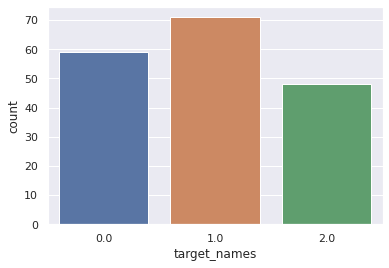

In [229]:
# Wine dataset

df.info()
sns.countplot(df['target_names'])

In [230]:
np.random.seed(64) # initialize a random seed, this will help us make the random stuff reproducible.

df = df.drop('magnesium_rate', axis=1)
df = df.drop('binned', axis=1)

X = df.drop('target_names', axis=1)
y = df['target_names']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [231]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(classification_report(y_true=y_test, y_pred=pred))

score on training set: 0.8045112781954887
score on test set: 0.6888888888888889
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        15
         1.0       0.70      0.39      0.50        18
         2.0       0.59      0.83      0.69        12

    accuracy                           0.69        45
   macro avg       0.69      0.72      0.68        45
weighted avg       0.70      0.69      0.67        45



In [232]:
np.random.seed(64) # initialize a random seed, this will help us make the random stuff reproducible.

X.drop('total_phenols', axis=1, inplace =True) # delete one of the correlating features
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y) # split the data again

#fit the same model again and print the scores
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(classification_report(y_true=y_test, y_pred=pred))

score on training set: 0.8045112781954887
score on test set: 0.6888888888888889
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        15
         1.0       0.70      0.39      0.50        18
         2.0       0.59      0.83      0.69        12

    accuracy                           0.69        45
   macro avg       0.69      0.72      0.68        45
weighted avg       0.70      0.69      0.67        45



#Feature Extraction using PCA, LDA

In [233]:
# LDA

X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

Accuracy 0.8611111111111112


In [234]:
X = np.random.random((25,3))
print(X)

[[0.3935599  0.09127837 0.36214869]
 [0.91205176 0.34325716 0.64652372]
 [0.91455337 0.94699259 0.16499357]
 [0.02330477 0.20889611 0.15592718]
 [0.83264977 0.82405119 0.90937754]
 [0.88169649 0.11829157 0.12588233]
 [0.95712492 0.43250336 0.69963949]
 [0.62123663 0.25834661 0.06612058]
 [0.08738233 0.64737553 0.17309207]
 [0.79881069 0.25873546 0.8805493 ]
 [0.98099749 0.18570031 0.47720293]
 [0.72522073 0.39558286 0.28402297]
 [0.57360056 0.77403205 0.07537768]
 [0.52269287 0.72905134 0.99734831]
 [0.77587289 0.91767371 0.64493204]
 [0.57887778 0.91956238 0.50573841]
 [0.73386077 0.39192193 0.23549997]
 [0.39006982 0.17995806 0.67133185]
 [0.22962989 0.93128459 0.84469673]
 [0.19869428 0.05590165 0.47183167]
 [0.87196831 0.40113814 0.35498085]
 [0.16834766 0.44483561 0.57398082]
 [0.85509222 0.94830422 0.59879882]
 [0.89521894 0.25210234 0.28324278]
 [0.34920544 0.62615601 0.67083096]]


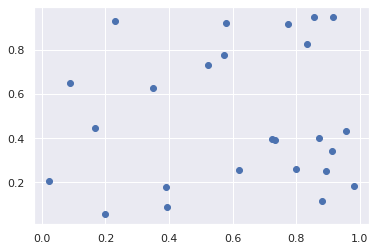

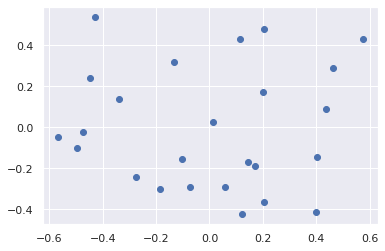

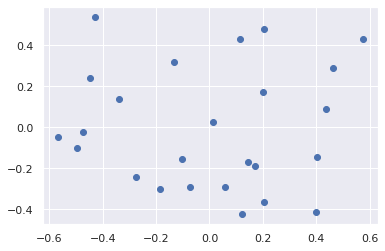

In [235]:
# PCA

plt.scatter(X[:,0], X[:,1])
plt.show()

pca1 = PCA(n_components=1) # extract 1 principal components
X_R1 = pca.fit_transform(X) # reduced X

plt.scatter(X_R1[:,0], X_R1[:,1])
plt.show()

pca2 = PCA(n_components=2) # extract 2 principal components
X_R2 = pca.fit_transform(X) # reduced X

plt.scatter(X_R2[:,0], X_R2[:,1])
plt.show()

#Matplotlib - Line Plot, Scatter Plot, Barchart, Histogram, Box Plot

In [236]:
df_IRIS = pd.DataFrame(data= iris['data'])
df_IRIS.columns = ['Sepal length','Sepal width','Petal length','Petal width']

df_IRIS1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']])
df_IRIS1.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Flower_species']

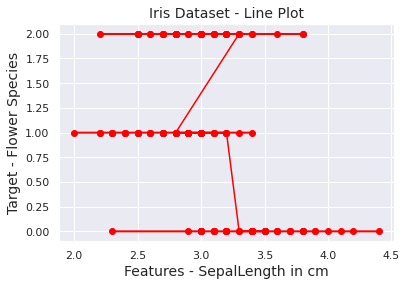

In [237]:
# Line Plot

plt.plot(iris.data[:, 1:2], iris.target, color='red', marker='o')
plt.title('Iris Dataset - Line Plot', fontsize=14)
plt.xlabel('Features - SepalLength in cm', fontsize=14)
plt.ylabel('Target - Flower Species', fontsize=14)
plt.grid(True)
plt.show()

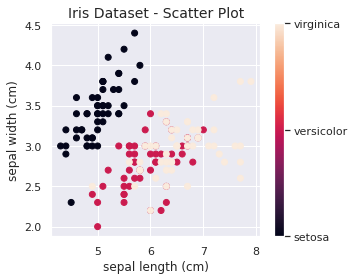

In [238]:
# Scatter Plot

# The indices of the features that we are plotting
x_index = 0 # Sepal length
y_index = 1 # Sepal width
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Iris Dataset - Scatter Plot', fontsize=14)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

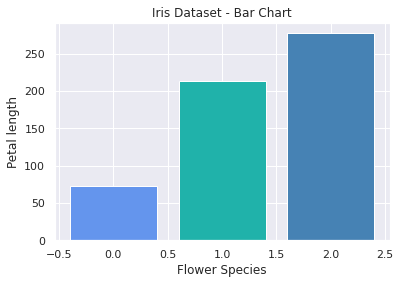

In [239]:
# Bar Chart

df = df_IRIS1.groupby('Flower_species')['Petal_length'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(df['Flower_species'],df['Petal_length'],color = ['cornflowerblue','lightseagreen','steelblue']) 
#Adding the aesthetics
plt.title('Iris Dataset - Bar Chart')
plt.xlabel('Flower Species')
plt.ylabel('Petal length') 
#Show the plot
plt.show()

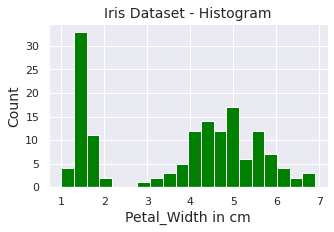

In [240]:
# Histogram

plt.figure(figsize = (5, 3))
x = iris.data[:, 2] 
plt.hist(x, bins = 20, color = "green")
plt.title('Iris Dataset - Histogram', fontsize=14)
plt.xlabel("Petal_Width in cm", fontsize=14)
plt.ylabel("Count", fontsize=14) 
plt.show()

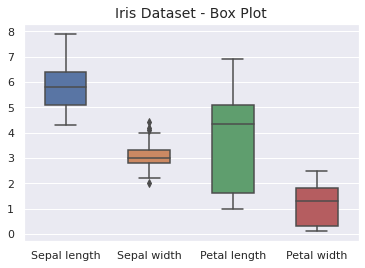

In [241]:
# Box plot

box_data = df_IRIS
sns.boxplot(data = box_data,width=0.5,fliersize=5)
plt.title('Iris Dataset - Box Plot', fontsize=14)
sns.set(rc={'figure.figsize':(7,5)})

**Submitted By**

---
Aneetta Sara Shany - *MTech CSE Software Engineering*

**Guide**

---
Dr. Shailesh Sivan